<a href="https://colab.research.google.com/github/talibilat/ce880labcoursework/blob/main/CE_880_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np                                                              #Importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                                                                                                 
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import svm
from sklearn.svm import SVC
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

In [3]:
from google.colab import files                                                  # Asking the user to upload the data
files.upload()

Saving fetal_health.csv to fetal_health.csv


{'fetal_health.csv': b'baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health\n120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0\n132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0\n133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0\n134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0\n132.0,0.007,0.0,0.008,0.0,0.0,0.0,16.0,2.4,0.0,19.9,

In [4]:
df =pd.read_csv('fetal_health.csv')
df                                                                     # Displaying the first 5 rows of the data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
df.columns                                                                      # Checking all the coulums of the date

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [7]:
df.describe(include="all").T                                                    # Generating discriptive statistics

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


Testing models before pre-preocessing and data visualisation

##Exploratory Data Analysis

---



---



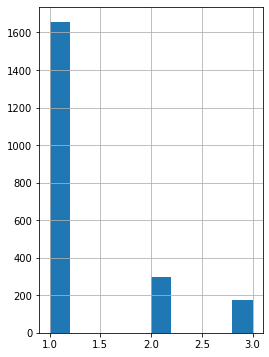

In [8]:
plt.figure(figsize=(4,6))
df["fetal_health"].hist()                                                       # Plotting all the values on a histogram to check how the data is distributed 

<function matplotlib.pyplot.show>

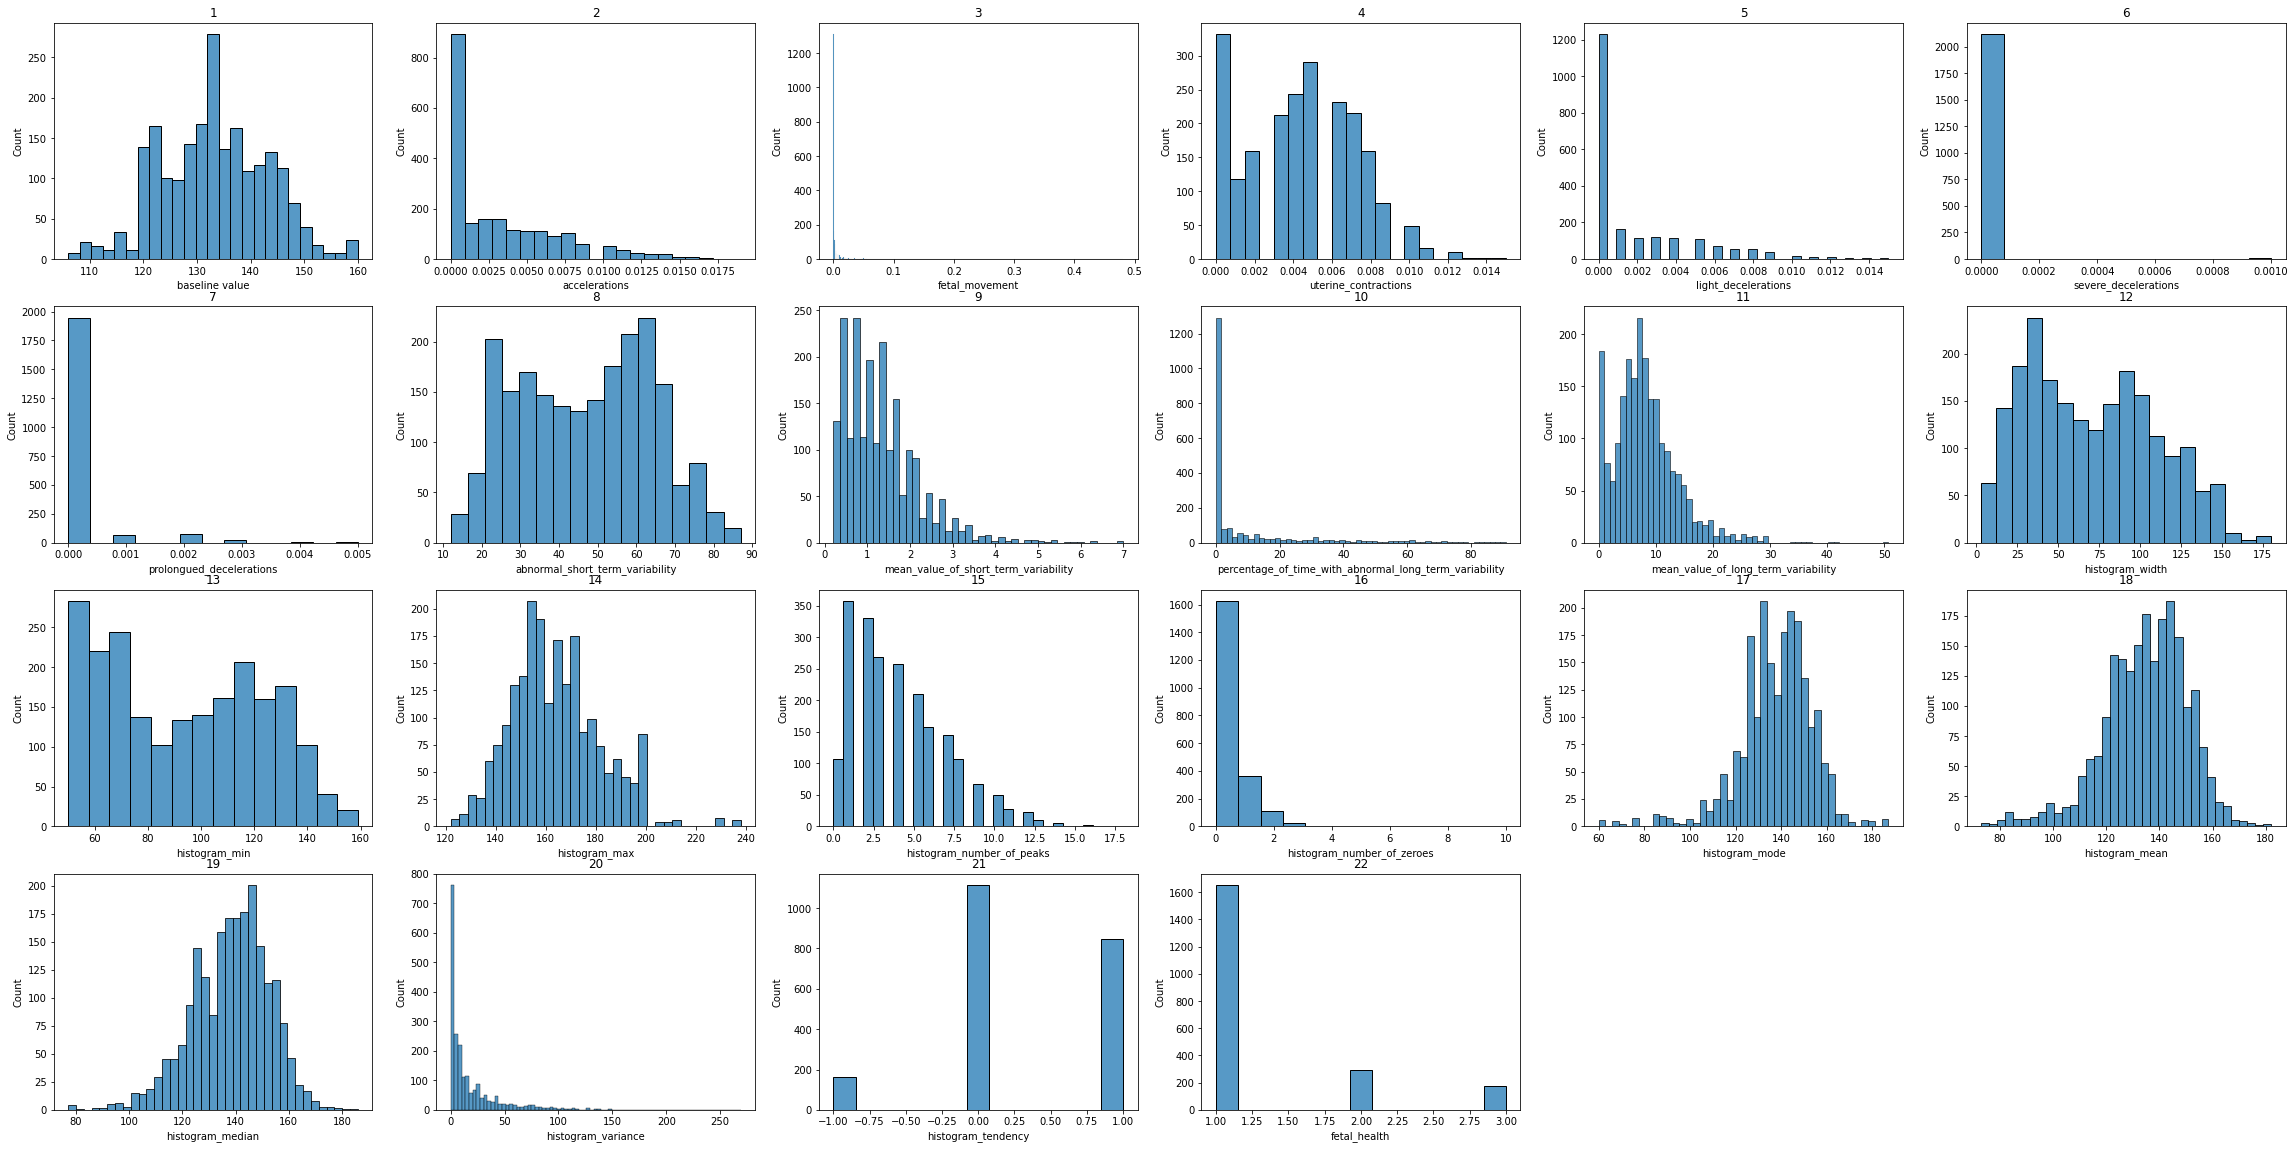

In [9]:
plt.figure(figsize=(40,20))

for i, column in enumerate(df.columns):
  plt.subplot(4,6,i+1)
  sns.histplot(data=df[column])
  plt.title(i+1)
plt.show

<function matplotlib.pyplot.show>

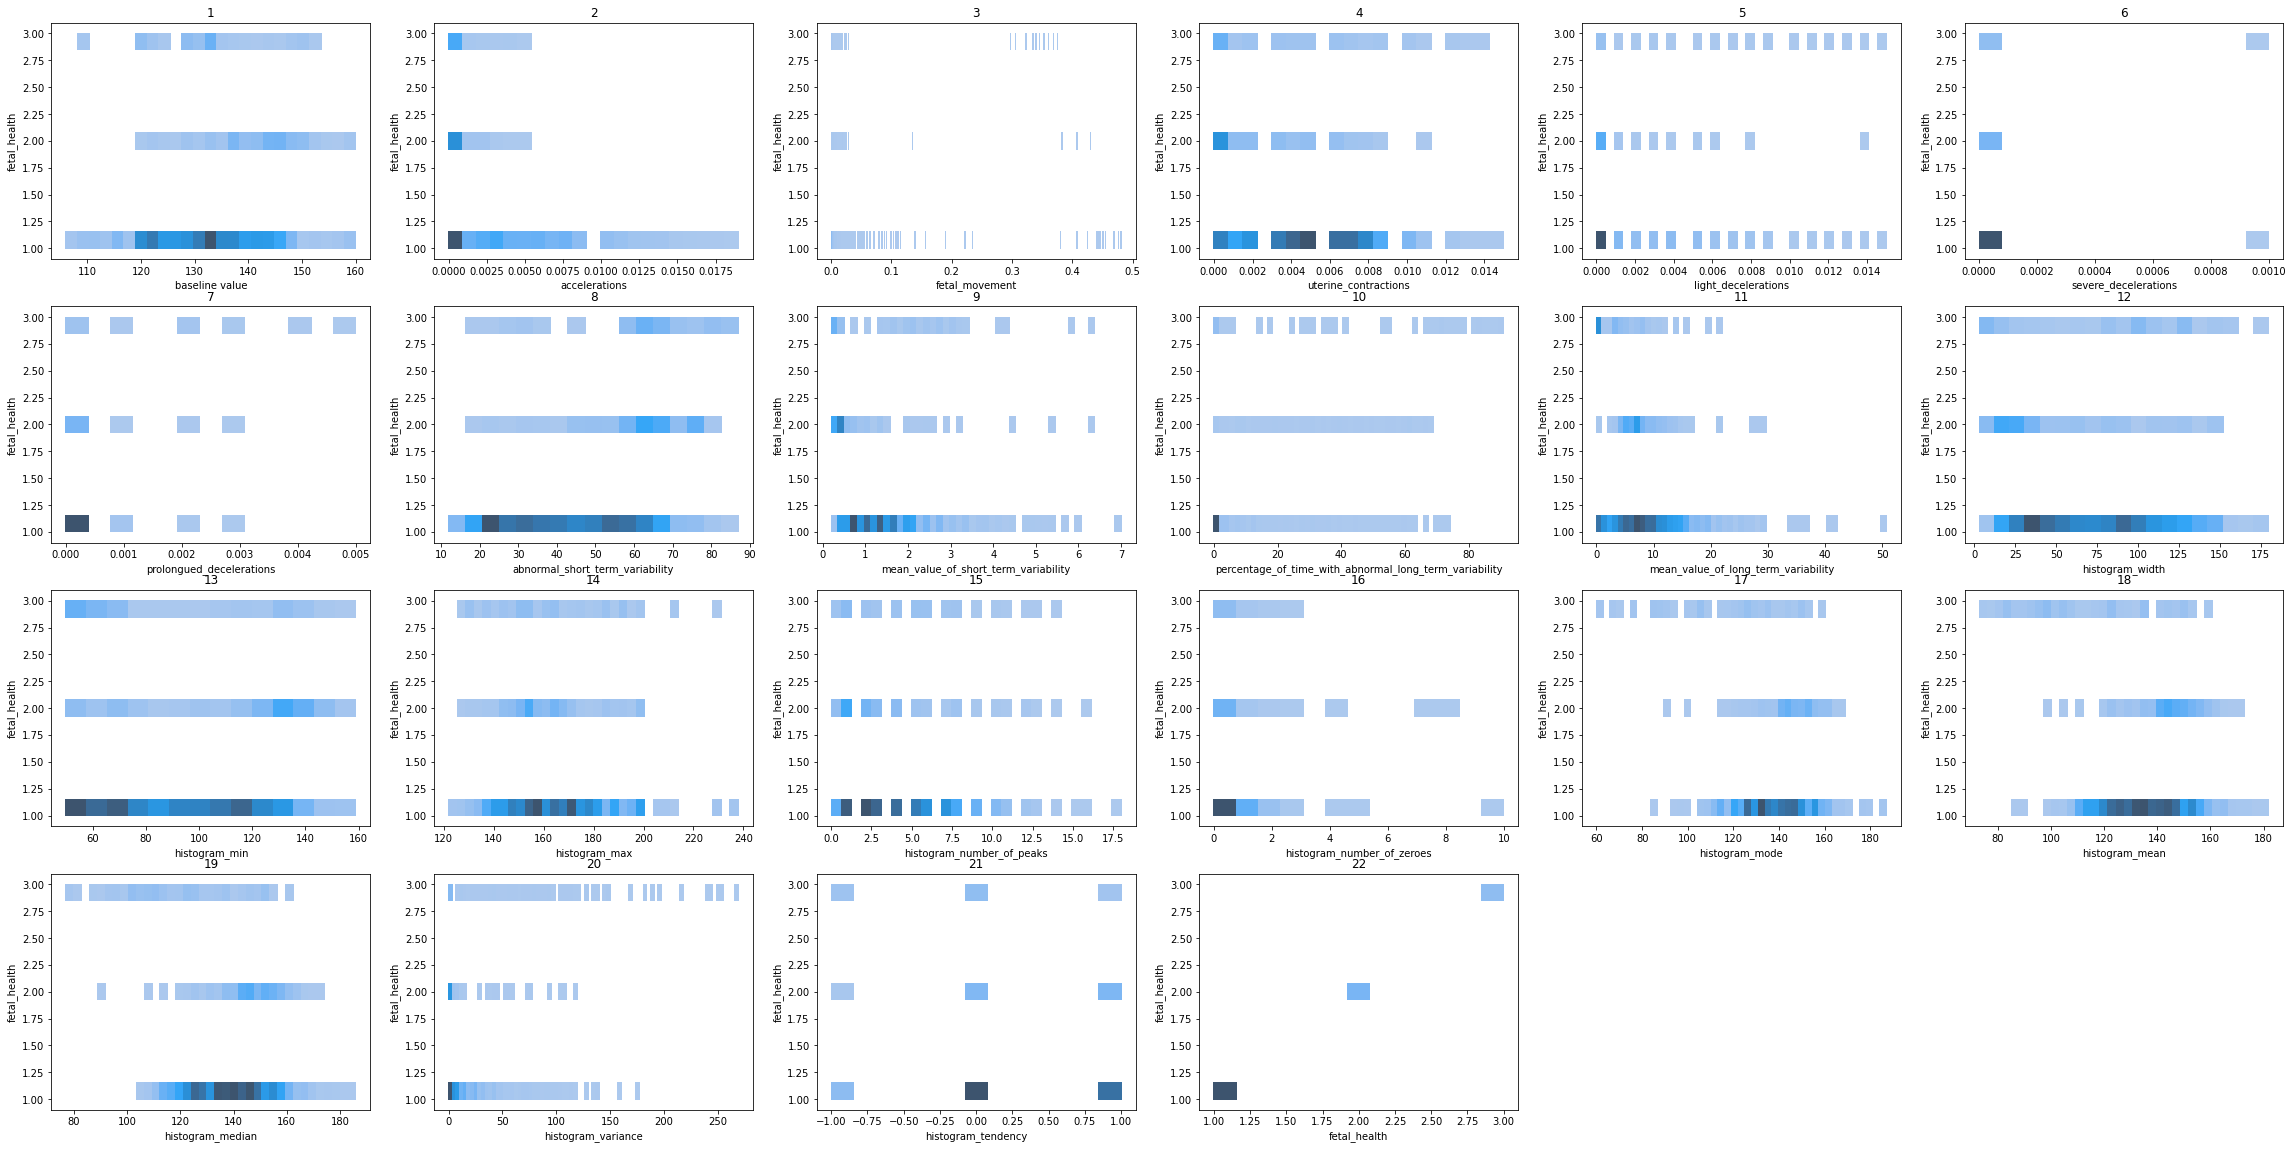

In [10]:
plt.figure(figsize=(40,20))

for i, column in enumerate(df.columns):
  plt.subplot(4,6,i+1)
  sns.histplot(x = df[column],y= df['fetal_health'])
  plt.title(i+1)
plt.show

Checking the distribution of all the features

We can see that all the features are normally distributed, except plot 3 and 5.

---



Below we will check for the outliers.

<function matplotlib.pyplot.show>

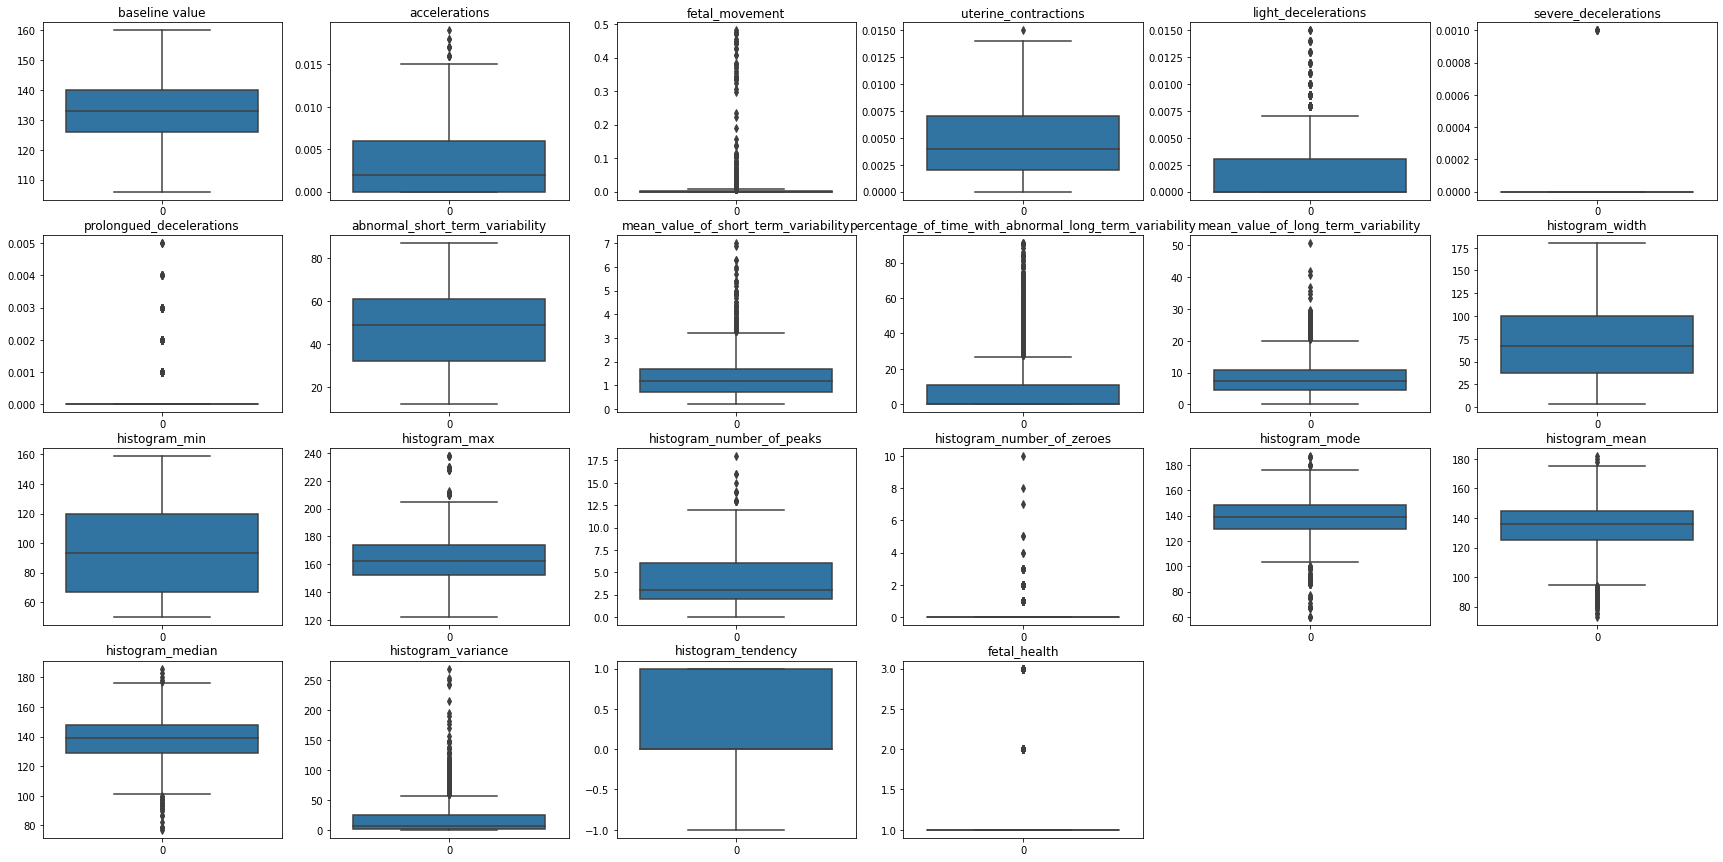

In [11]:
plt.figure(figsize=(30,15))

for i, column in enumerate(df.columns):
  plt.subplot(4,6,i+1)
  sns.boxplot(data=df[column])
  plt.title(column)
plt.show

We can see that we have couple of outliers; however, we are not not going to romove them as we have limited features for our model to train on.

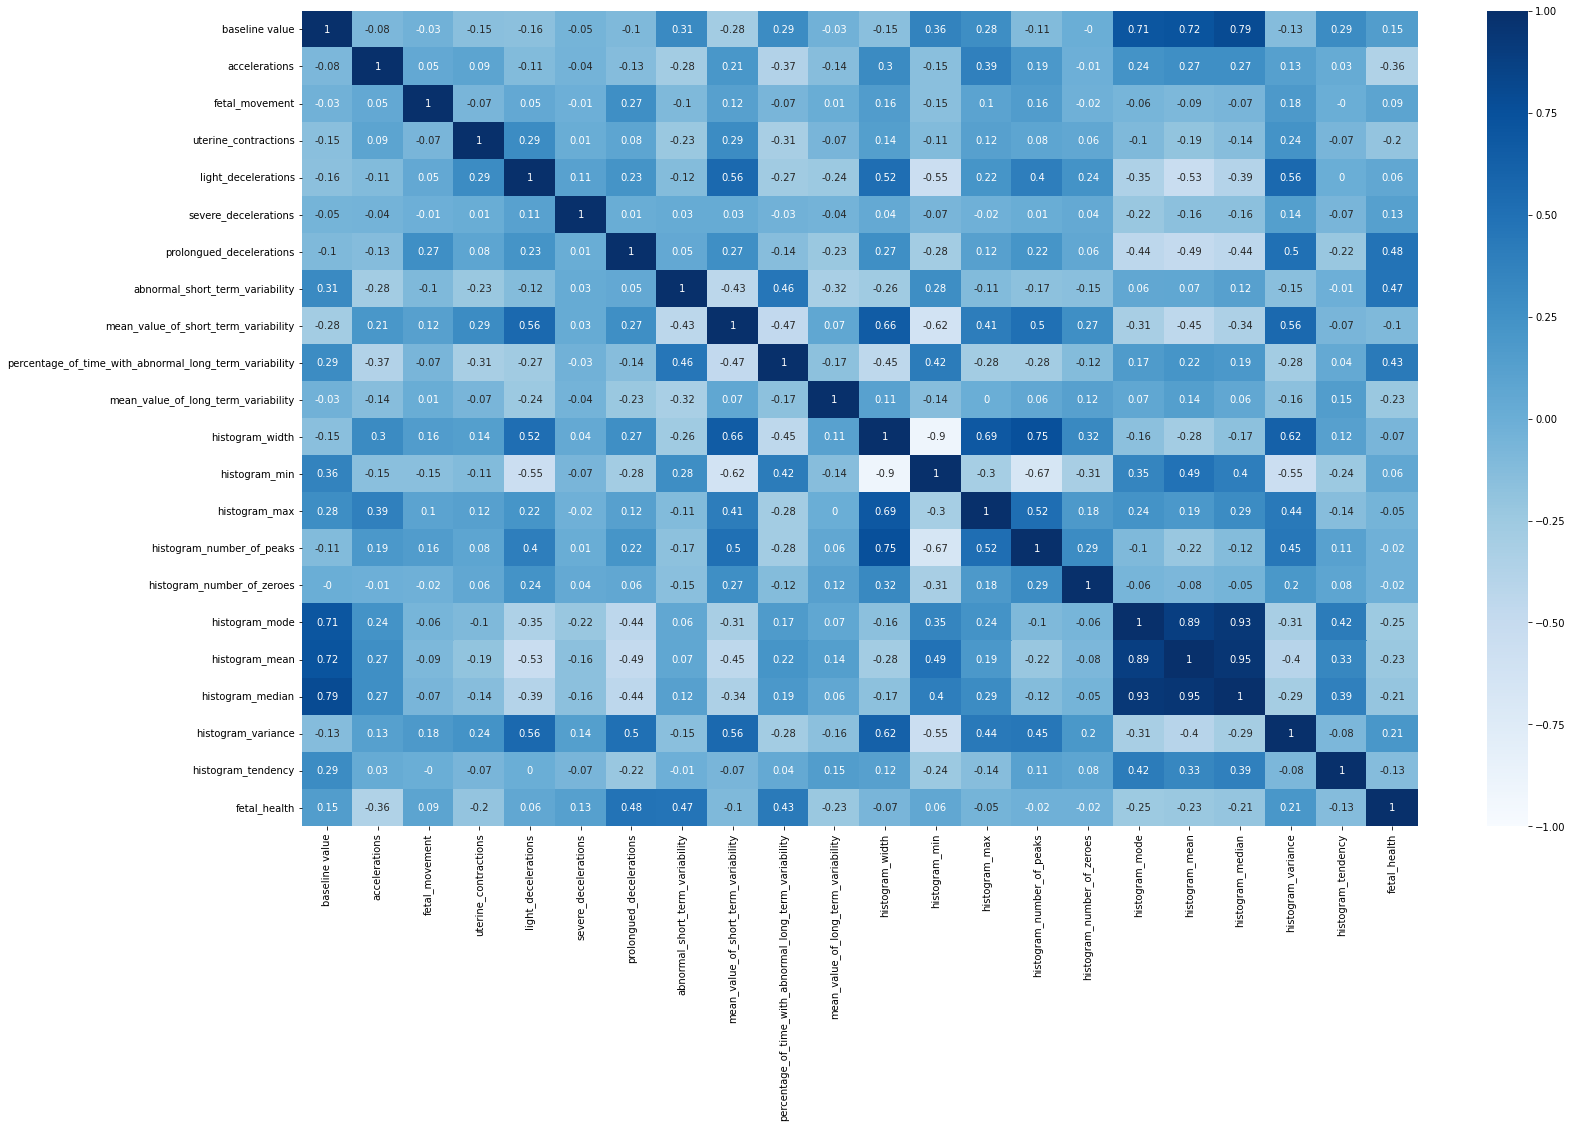

In [12]:

plt.figure(figsize=(25,15))
sns.heatmap(round(df.corr(),2),annot=True, vmin = -1.0, cmap= "Blues")
plt.show()

#Preprocessing

---

Dropping duplicates

In [13]:
df.drop_duplicates(keep='first', inplace = True)
df.shape

(2113, 22)

In [14]:
df.duplicated().sum()

0

In [15]:
new_df = df.drop(['severe_decelerations'], axis=1)
# ['histogram_median', 'histogram_mode',

Removing the outliers

In [16]:
outliers = ['histogram_variance','histogram_mean','histogram_median','histogram_mode','fetal_movement','percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability']

def boundries(df, att):
  high = df[att].mean() + 3*df[att].std()
  low = df[att].mean() - 3*df[att].std()
  return high,low


for i in outliers:
  high,low = boundries(df,i)
  print('\n',i,high,low)
  new_df = new_df[(new_df[i] < high) & (new_df[i] > low)]
  print(new_df.shape)


 histogram_variance 106.02353804248352 -68.20905626302303
(2070, 21)

 histogram_mean 181.430886429531 87.7683563532423
(2049, 21)

 histogram_median 181.52631733915368 94.65257523065227
(2044, 21)

 histogram_mode 186.66040685921732 88.24825381281298
(2033, 21)

 fetal_movement 0.1499285452289833 -0.13089399719301537
(2008, 21)

 percentage_of_time_with_abnormal_long_term_variability 64.80629603538323 -45.21613985933023
(1949, 21)

 mean_value_of_long_term_variability 25.065370667717595 -8.732100435819845
(1916, 21)


In [84]:
X =new_df.drop(columns='fetal_health',axis=1)                                       # Removing the target column from the date and assigning it to variable y
y=new_df['fetal_health']

Train/Test Split

In [39]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [40]:
print("X Train Shape:", X_train.shape)                                          # Checking the shape of the splitted data
print("X Train Shape:", y_train.shape)
print("X Train Shape:", X_test.shape ) 
print("X Train Shape:", y_test.shape)

X Train Shape: (1532, 20)
X Train Shape: (1532,)
X Train Shape: (384, 20)
X Train Shape: (384,)


Checking the training and test accuracy on myltiple models to check which model to select for further hypertuning.

In [41]:
models = {
    "     Logistic Regression" : LogisticRegression(),
    "     K-Nearest Neighbour" : KNeighborsClassifier(),
    "  Support Vector Machine" : SVC(),
    "Decision Tree CLassfiier" : DecisionTreeClassifier(),
    "                XGBboost" : XGBClassifier(),
    "           Random Forest" : RandomForestClassifier(),
    "                     ANN" : MLPClassifier()
 }


print("Training accuracy :")
for name, model in models.items():
  model.fit(X_train,y_train)
  print(name + ": {:.2f}%".format(model.score(X_train,y_train) * 100))


print("Test Accuracy")
for name, model in models.items():
  model.predict(X_test)
  print(name + ": {:.2f}%".format(model.score(X_test,y_test) * 100))

Training accuracy :
     Logistic Regression: 91.25%
     K-Nearest Neighbour: 93.67%
  Support Vector Machine: 93.34%
Decision Tree CLassfiier: 100.00%
                XGBboost: 98.56%
           Random Forest: 100.00%
                     ANN: 98.11%
Test Accuracy
     Logistic Regression: 93.49%
     K-Nearest Neighbour: 91.67%
  Support Vector Machine: 93.23%
Decision Tree CLassfiier: 94.27%
                XGBboost: 94.79%
           Random Forest: 94.53%
                     ANN: 95.57%


We will be applying RandomizedSearchCV for hyperparamatertuning

---

# XGBooster

In [21]:
#Defining the parameters
space={
    'max_depth'          : [ 3, 4, 5, 6, 8, 10, 12, 15 ], 
    "learning_rate"      : [ 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ], 
    "n_estimators"       : [ 50, 75, 100, 125, 150 ], 
    "min_child_weight"   : [ 1, 3, 5, 7 ],
    "gamma"              : [ 0.0, 0.1, 0.2, 0.3, 0.4 ],
    "colsample_bytree"   : [ 0.3, 0.4, 0.5, 0.7 ] 
    }

random_search = RandomizedSearchCV(
                                   estimator = XGBClassifier(),
                                   param_distributions=space,
                                   n_iter=50,
                                   scoring="roc_auc",
                                   n_jobs=-1,
                                   cv=5,
                                   verbose=3
                                   )

#Fitting the model for RandomCV
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [50, 75, 100, 125,
                                                         150]},
                   scoring='roc_auc', verbose=3)

In [22]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=10,
              n_estimators=50, objective='multi:softprob')

In [23]:
random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.3,
 'learning_rate': 0.15,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 50}

In [24]:
# Using the best estimators to calculate the
m = XGBClassifier(
                  colsample_bytree=0.3, 
                  gamma=0.0, 
                  learning_rate=0.2, 
                  max_depth=10,
                  n_estimators=100, 
                  objective='multi:softprob',
                  )


m.fit(X_train,y_train)
score = cross_val_score(m,X_train,y_train,cv=10)
print("Training:\nAverage score for 10CV is : ", score.mean())



y_pred_train = m.predict(X_test)
print("\nTesting:\nAccuracy score of test data is: ", m.score(X_test,y_test) )

Training:
Average score for 10CV is :  0.9504159239453358

Testing:
Accuracy score of test data is:  0.9557291666666666


[[317   8   0]
 [  9  44   0]
 [  0   0   6]]


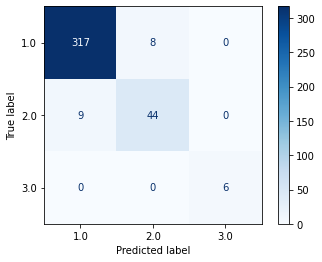

In [25]:
# Calculating the confision matrix

y_pred_test =m.predict(X_test)
print(confusion_matrix(y_test,y_pred_test))
plot_confusion_matrix(m, X_test, y_test,cmap="Blues")
plt.show()

In [26]:
# Printing the Classification Report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         1.0       0.97      0.98      0.97       325
         2.0       0.85      0.83      0.84        53
         3.0       1.00      1.00      1.00         6

    accuracy                           0.96       384
   macro avg       0.94      0.94      0.94       384
weighted avg       0.96      0.96      0.96       384



#Random Forest Classifier


n_estimators = number of trees in the foreset

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node

bootstrap = method for sampling data points (with or without replacement)



In [ ]:
main_model_rfc = RandomForestClassifier()

params={
            'max_depth'               : [4,6,8,12], 
            'max_features'            : [6,7,8], 
            'min_samples_leaf'        : [2, 4], 
            'min_samples_split'       : [2, 5, ], 
            'n_estimators'            : [ 75,100,200],
            'criterion'               : [ "gini", "entropy" ]
}

random_search_rfc = GridSearchCV(
                                       estimator=RandomForestClassifier(class_weight='balanced'), 
                                       param_grid=params, 
                                       cv=5, 
                                       verbose=3,
                                       return_train_score= True
                                       )
random_search_rfc.fit(X_train,y_train)

In [33]:
random_search_rfc.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, max_features=8, min_samples_leaf=2,
                       min_samples_split=5)

In [34]:
random_search_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [94]:
model_rfc = RandomForestClassifier(
                                   class_weight      = 'balanced',
                                   bootstrap         = False,
                                   criterion         = 'entropy',
                                   max_depth         = 12, 
                                   max_features      = 8,
                                   min_samples_leaf  = 2, 
                                   min_samples_split = 5,
                                   n_estimators      = 100)
m = model_rfc.fit(X_train,y_train)
score_rfc = cross_val_score(model_rfc,X_train,y_train,cv=10)
print("Training:\nAverage score for 10CV is : ", score_rfc.mean())

y_pred_train_rfc = model_rfc.predict(X_test)
print("\nTesting:\nAccuracy score of test data is: ", model_rfc.score(X_test,y_test) )

Training:
Average score for 10CV is :  0.9490917579152873

Testing:
Accuracy score of test data is:  0.9583333333333334


[[313  11   1]
 [  6  46   1]
 [  0   0   6]]


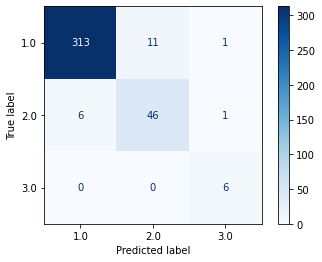

In [45]:
y_pred_test_rfc =model_rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred_test_rfc))
plot_confusion_matrix(model_rfc, X_test, y_test,cmap="Blues")
plt.show()

In [97]:
print(classification_report(y_test,y_pred_test_rfc))

              precision    recall  f1-score   support

         1.0       0.98      0.96      0.97       325
         2.0       0.81      0.87      0.84        53
         3.0       0.75      1.00      0.86         6

    accuracy                           0.95       384
   macro avg       0.85      0.94      0.89       384
weighted avg       0.95      0.95      0.95       384



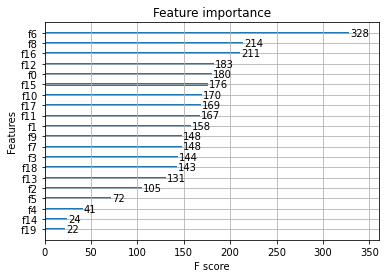

In [91]:
plot_importance(random_search.best_estimator_, )

Text(0.5, 1.0, 'Feature Importance')

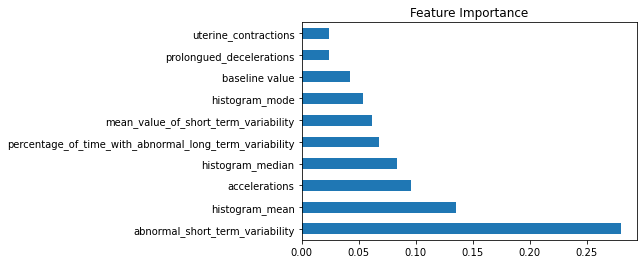

In [85]:
plt = pd.Series(model_rfc.feature_importances_, index=X.columns).nlargest(10).plot(kind='barh')
plt.set_title('Feature Importance')